## **Algoritmo Dijkstra**
El algoritmo de Dijkstra explora sistemáticamente los caminos más cortos desde un nodo origen, actualizando distancias de forma eficiente.

Una vez que Dijkstra calcula las distancias mínimas, el diccionario de predecesores te permite reconstruir el camino exacto desde el nodo de origen hasta cualquier otro nodo.

![Descripción opcional](https://upload.wikimedia.org/wikipedia/commons/5/57/Dijkstra_Animation.gif)


### **🛠 ¿Para qué es útil en la práctica?**

| Área             | Uso de Dijkstra  |
| ---------------- | --------------------------------------------------------------- |
| Recomendaciones  | ¿qué película es más ‘cercana’ a tu gusto? |
| Finanzas         | minimizar el costo de una cadena de decisiones |
| Logística        | ¿cómo enviar un paquete por la ruta más barata?     |
| Redes            | ¿por dónde fluye más rápido la información?   |


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

C:\Users\USER\AppData\Local\Temp\ipykernel_16188\691211620.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


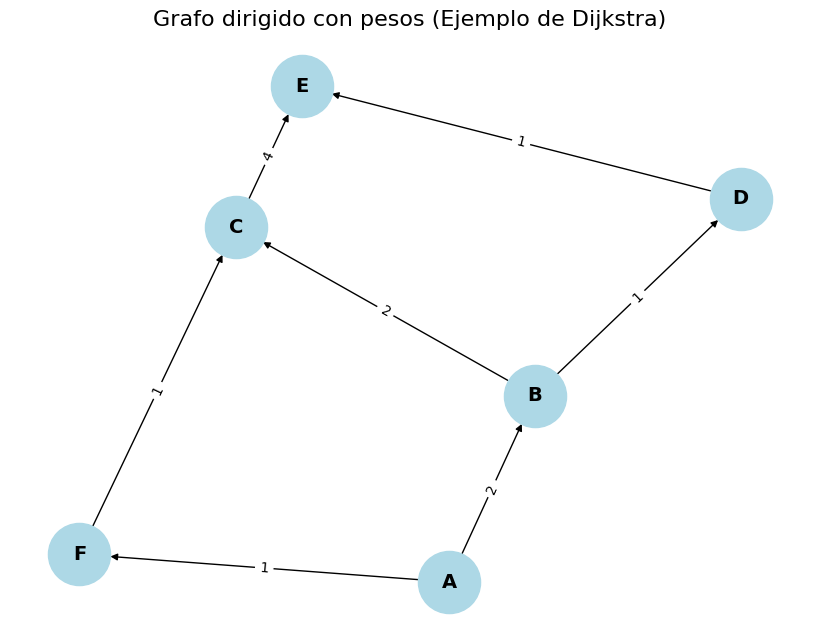

Distancias mínimas desde A:
{'A': 0, 'B': 2, 'F': 1, 'C': 2, 'D': 3, 'E': 4}

Predecesores:
{'A': None, 'B': 'A', 'F': 'A', 'C': 'F', 'D': 'B', 'E': 'D'}


In [26]:
# Crear el grafo dirigido y ponderado
G = nx.DiGraph()
edges = [
    ('A', 'B', 2),
    ('A', 'F', 1),
    ('F', 'C', 1),
    ('B', 'D', 1),
    ('B', 'C', 2),
    ('D', 'E', 1),
    ('C', 'E', 4),
]
G.add_weighted_edges_from(edges)

# Función para aplicar Dijkstra
def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0
    predecessors = {node: None for node in graph.nodes}
    visited = set()
    heap = [(0, start)]

    while heap:
        current_distance, current_node = heapq.heappop(heap)
        if current_node in visited:
            continue
        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            weight = graph[current_node][neighbor]['weight']
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                heapq.heappush(heap, (distance, neighbor))
    
    return distances, predecessors

# Ejecutar Dijkstra desde un nodo
distances, predecessors = dijkstra(G, 'A')

# Dibujar el grafo con pesos
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=14, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Grafo dirigido con pesos (Ejemplo de Dijkstra)', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Imprimir resultados
print('Distancias mínimas desde A:')
print(distances)

print('\nPredecesores:')
print(predecessors)


C:\Users\USER\AppData\Local\Temp\ipykernel_16188\3125197909.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


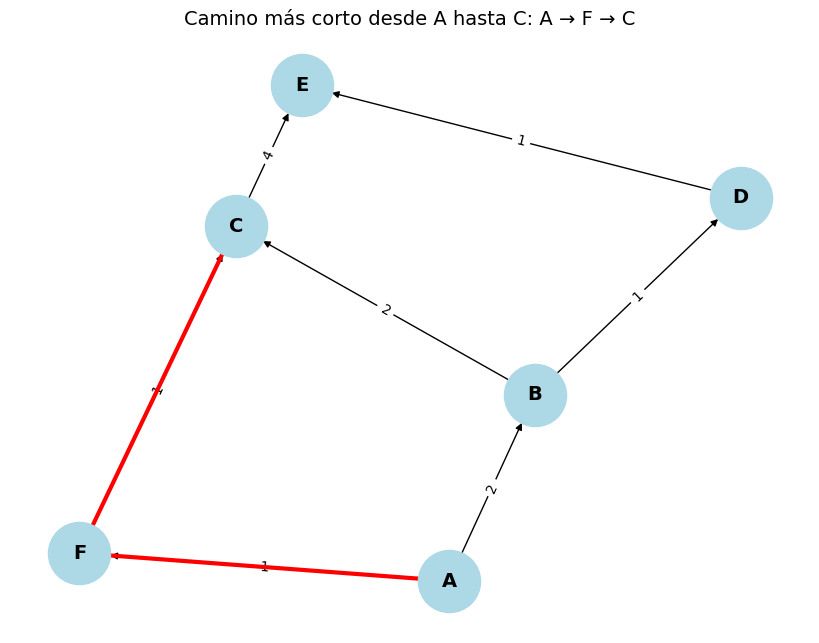

In [28]:
# Función para reconstruir el camino desde el nodo inicial hasta un destino
def rebuild_path(predecessors, target):
    path = []
    current = target
    while current is not None:
        path.append(current)
        current = predecessors[current]
    return path[::-1]  # invertir el path

# Nodo destino a visualizar
target_selected = 'C'
shortest_path = rebuild_path(predecessors, target_selected)

# Crear una lista de aristas que forman el path más corto
aristas_path = list(zip(shortest_path[:-1], shortest_path[1:]))

# Posiciones de los nodos
pos = nx.spring_layout(G, seed=42)
labels = nx.get_edge_attributes(G, 'weight')

# Dibujar el grafo destacando el camino más corto
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=14, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G, pos, edgelist=aristas_path, edge_color='red', width=3)

plt.title(f"Camino más corto desde A hasta {target_selected}: {' → '.join(shortest_path)}", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


### **🧠 Otros algoritmos que pueden ser más óptimos dependiendo del caso:**

| Algoritmo          | Mejor para...                                                        | Ventajas                                         |
| ------------------ | -------------------------------------------------------------------- | ------------------------------------------------ |
| **Bellman-Ford**   | Pesos negativos, detectar ciclos negativos                           | Más general que Dijkstra                         |
| **A\*** (A-Star)   | Búsqueda hacia un objetivo específico con heurística                 | Más rápido si hay una buena heurística           |
| **Floyd-Warshall** | Caminos más cortos entre **todos los pares de nodos**                | Simple de implementar, útil para grafos pequeños |
| **BFS**            | Grafos no ponderados (peso implícito = 1)                            | Extremadamente rápido y simple                   |
| **Johnson's**      | Todos los pares en grafos con pesos negativos (sin ciclos negativos) | Usa Dijkstra + reponderación                     |
